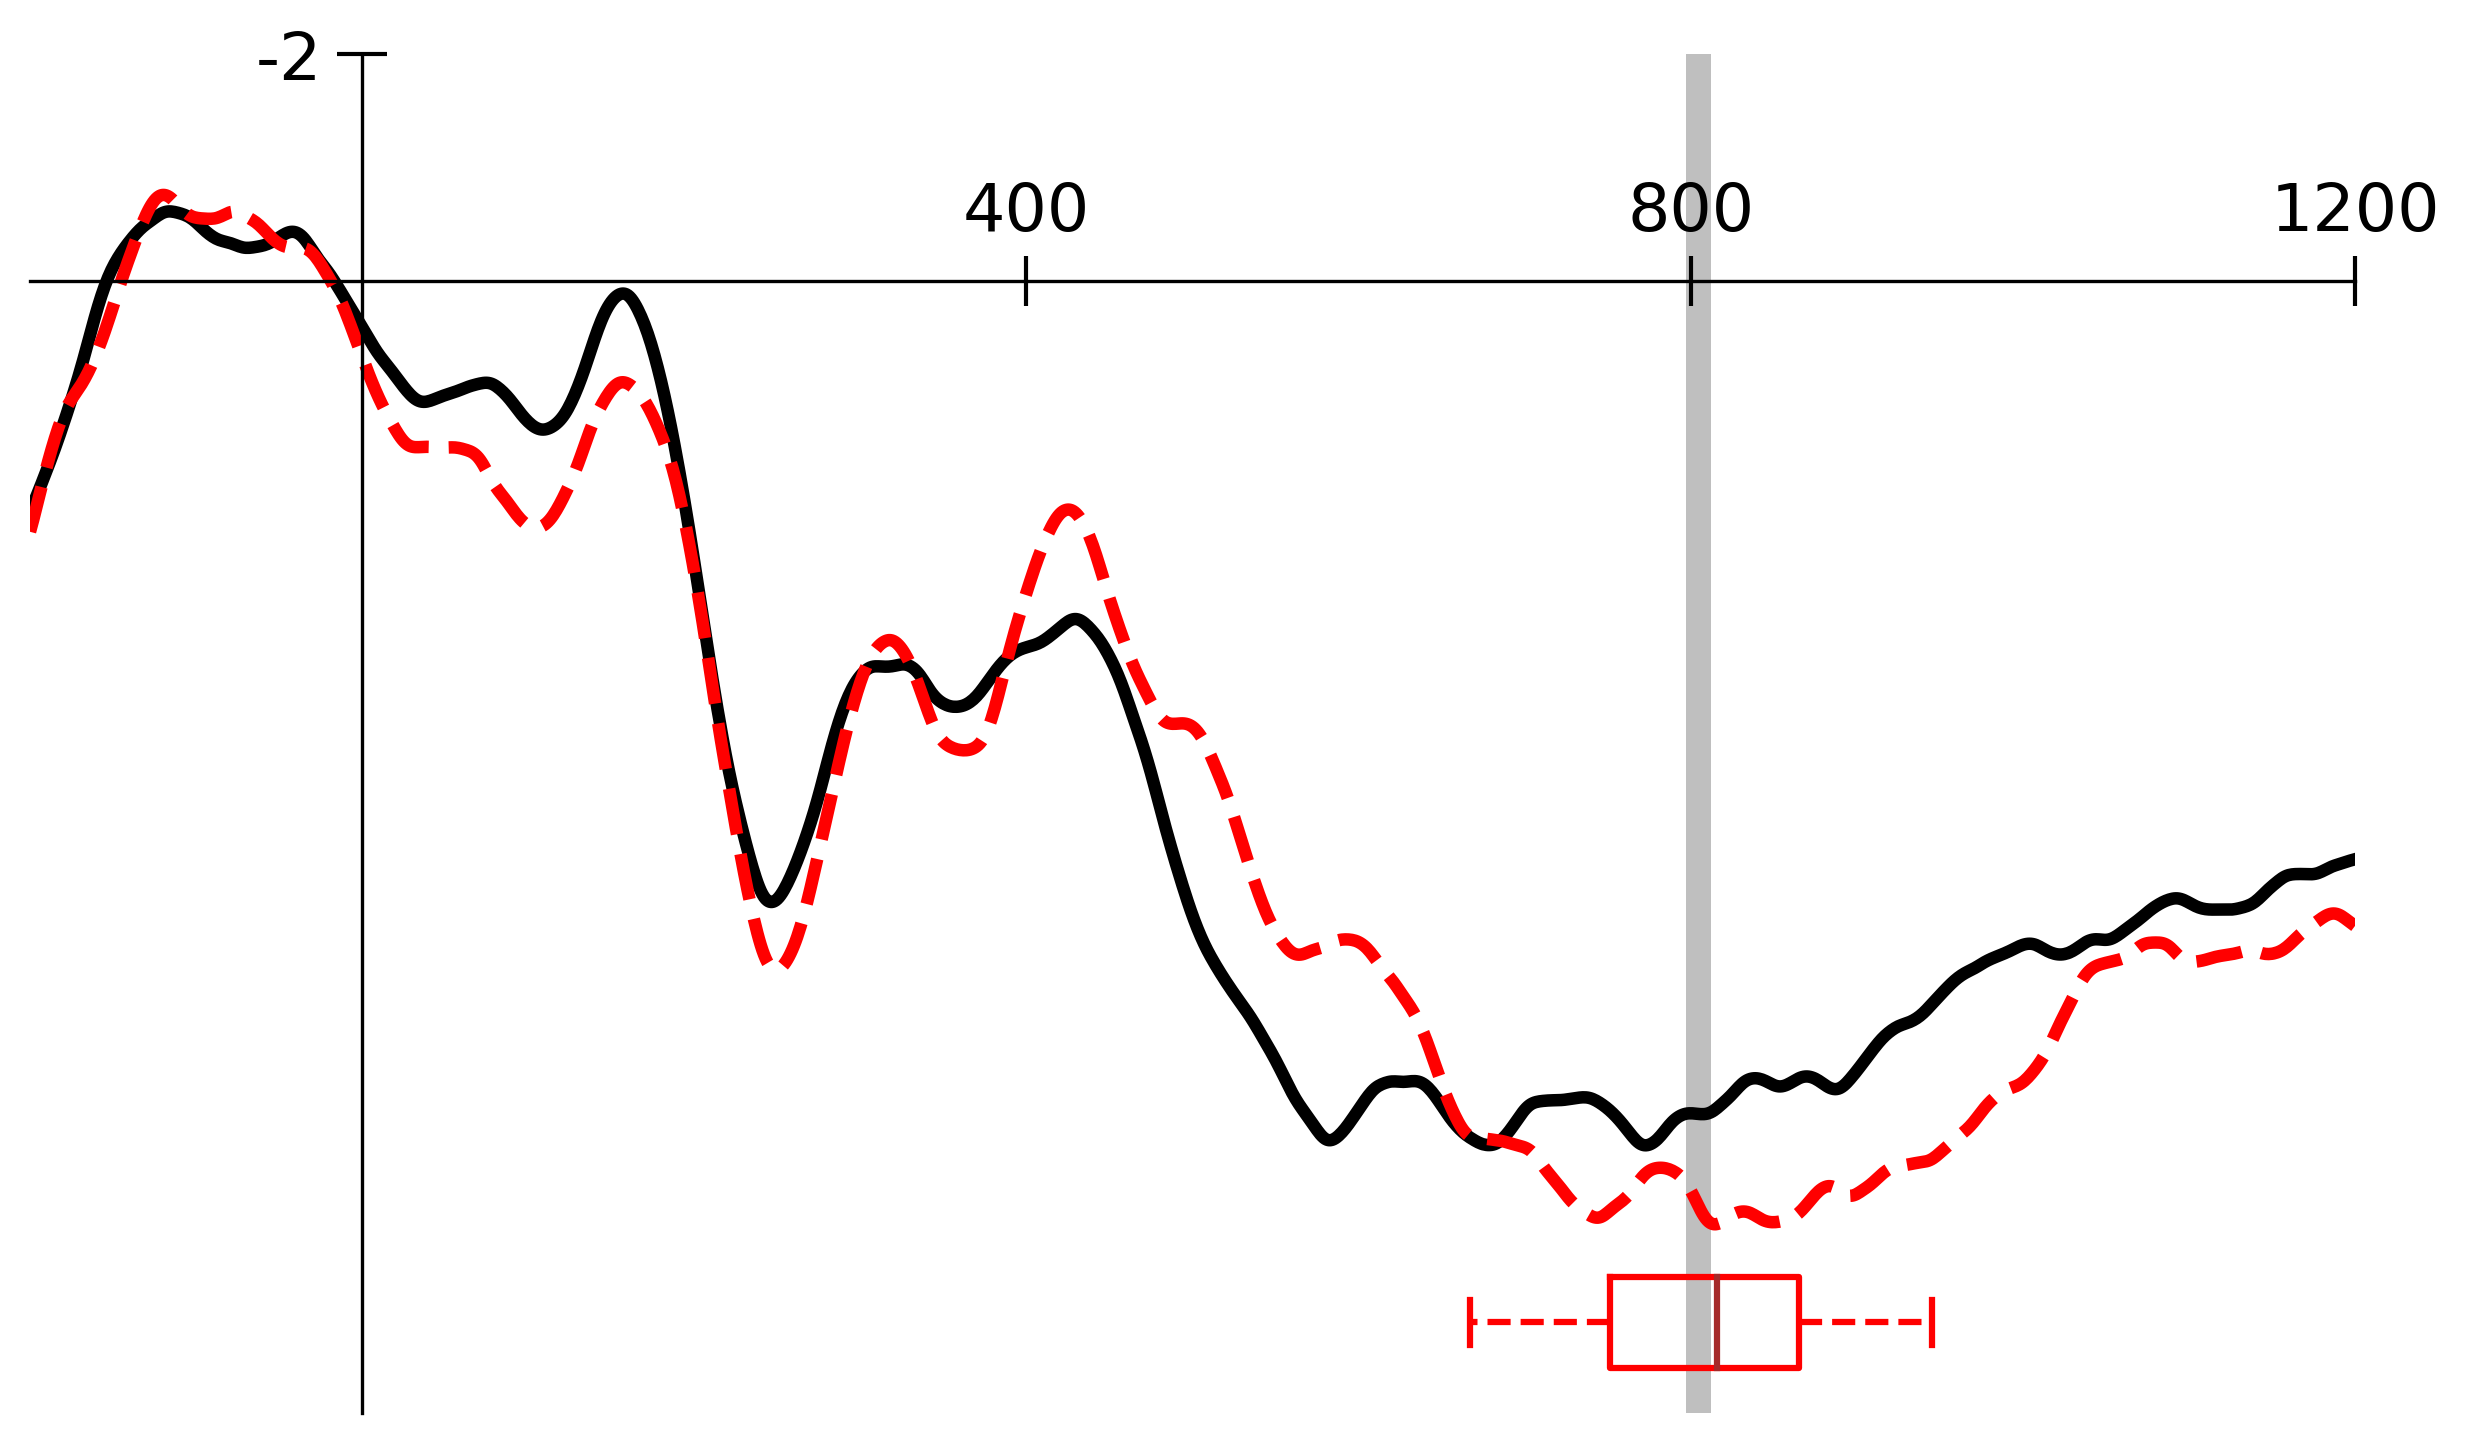

In [4]:
# import liabrary
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# set directory
fd_dir = "C:/Users/Marco/Desktop/plot_demo"
os.chdir(fd_dir)

# create an array for x-axis
xmin = -200
xmax = 1200
xnum = xmax - xmin + 1
x = np.linspace(xmin,xmax,xnum)

# data direactory
bin22_dir = fd_dir + '/data/' + 'FS_FS+_bin22.csv'
bin24_dir = fd_dir + '/data/' + 'FS_FS+_bin24.csv'
peak_dir = fd_dir + '/data/' + 'P600_peaklatency_allchan_noM1M2.csv'

# read data
y1 = pd.read_csv(bin22_dir, header = None)
y2 = pd.read_csv(bin24_dir, header = None)
peak_val = pd.read_csv(peak_dir)

# plotting waveforms
fig = plt.figure(num=None,figsize=(10,6),dpi=300)
plt.plot(x,y1.iloc[0],color='black',linewidth=3,linestyle='-',alpha=1)
plt.plot(x,y2.iloc[0],color='red',linewidth=3,linestyle='--',alpha=1)
plt.xlim((xmin,xmax)) 
plt.ylim((10,-2)) # reverse y-axis
plt.tick_params(axis='x', length = 12, width=1, colors='black', labelsize=16, direction='inout', pad=-30)
plt.tick_params(axis='y', length = 12, width=1, colors='black', labelsize=16, direction='inout')

# axes adjustment
ax = plt.gca() # get current axes
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

# set ticks
plt.xticks([400,800,1200])
plt.yticks([-2])

# time window: 797~812ms
rect = patches.Rectangle((797,-2),width=15,height=12,color='gray',ec=None,alpha=0.5)
ax.add_patch(rect)

# boxplot
boxprops = dict(linestyle='-', linewidth=1.5, color='red')
medianprops = dict(linestyle='-', linewidth=1.5, color='brown')
whiskerprops = dict(linestyle='--',linewidth=1.5, color='red')
capprops = dict(linestyle='-', linewidth=1.5, color='red')
ax.boxplot(peak_val.iloc[:,1], medianprops=medianprops, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, widths = 0.8, vert=False, positions=[9.2], labels=None)

# adjustment for y ticks after boxplot
plt.yticks([-2])
ax.set_yticklabels([-2])

# save figure
group = 'FS+'
chlabel = 'CPZ'
fname = group + '_' + chlabel + '_plot.pdf'
opt_dir = 'C:/Users/Marco/Desktop/plot_demo/figure/'
opt_file = opt_dir + fname
plt.savefig(opt_file, transparent=True, orientation='landscape')
